In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_dir = "/content/drive/MyDrive/srbd/locked-object-motion-tracking"
%cd /content/drive/MyDrive/srbd/locked-object-motion-tracking

/content/drive/MyDrive/srbd/locked-object-motion-tracking


In [ ]:
!rm -r /content/drive/MyDrive/srbd/locked-object-motion-tracking/output

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import os
img_list = os.listdir('dataset/raw_data')

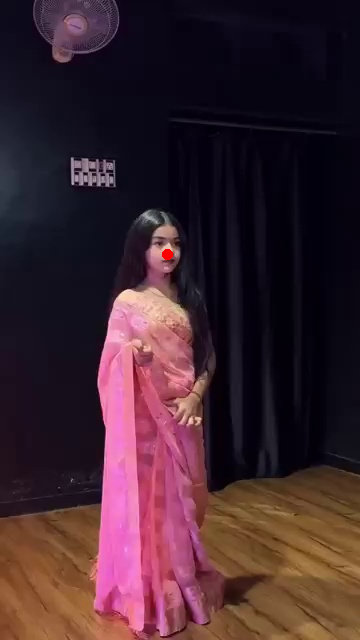

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# Load image (replace 'your_image.jpg' with the actual image path)
img_path = '/content/frame_0.jpg'
image = Image.open(img_path)
# Define the point coordinates
point = (167, 254)
# Create a drawing object
draw = ImageDraw.Draw(image)
# Draw the point (using a small circle for visibility)
radius = 5
draw.ellipse([point[0] - radius, point[1] - radius, point[0] + radius, point[1] + radius], fill="red")

display(image)

In [ ]:
print(img_list)

['frame3.jpg', 'frame8.jpg', 'frame7.jpg', 'frame5.jpg', 'frame25.jpg', 'frame30.jpg', 'frame38.jpg', 'frame9.jpg', 'frame14.jpg', 'frame1.jpg', 'frame35.jpg', 'frame37.jpg', 'frame34.jpg', 'frame13.jpg', 'frame44.jpg', 'frame31.jpg', 'frame24.jpg', 'frame27.jpg', 'frame4.jpg', 'frame17.jpg', 'frame10.jpg', 'frame33.jpg', 'frame28.jpg', 'frame11.jpg', 'frame21.jpg', 'frame41.jpg', 'frame45.jpg', 'frame42.jpg', 'frame23.jpg', 'frame29.jpg', 'frame26.jpg', 'frame18.jpg', 'frame16.jpg', 'frame15.jpg', 'frame36.jpg', 'frame12.jpg', 'frame39.jpg', 'frame43.jpg', 'frame2.jpg', 'frame19.jpg', 'frame22.jpg', 'frame20.jpg', 'frame32.jpg', 'frame6.jpg', 'frame40.jpg', 'frame62.jpg', 'frame64.jpg', 'frame83.jpg', 'frame134.jpg', 'frame132.jpg', 'frame96.jpg', 'frame55.jpg', 'frame143.jpg', 'frame92.jpg', 'frame110.jpg', 'frame111.jpg', 'frame113.jpg', 'frame85.jpg', 'frame119.jpg', 'frame74.jpg', 'frame57.jpg', 'frame94.jpg', 'frame148.jpg', 'frame115.jpg', 'frame72.jpg', 'frame51.jpg', 'frame70.

In [ ]:
point = (385, 250)

# Inference SAM Model

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam_b.pt")

# Display model information (optional)
model.info()

Model summary: 243 layers, 93,735,472 parameters, 93,735,472 gradients


(243, 93735472, 93735472, 0.0)

In [ ]:

# Run inference with single point
results = model(image, points=[900, 370], save_dir="/content/output")


0: 1024x1024 1 0, 43674.2ms
Speed: 15.0ms preprocess, 43674.2ms inference, 8.3ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
print(len(results))

1


In [ ]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0'}
obb: None
orig_img: array([[[ 30,  37,  40],
        [ 30,  37,  40],
        [ 30,  38,  38],
        ...,
        [103,  99,  41],
        [104,  99,  44],
        [100,  95,  40]],

       [[ 30,  37,  40],
        [ 30,  37,  40],
        [ 30,  38,  38],
        ...,
        [124, 119,  64],
        [124, 118,  65],
        [125, 119,  66]],

       [[ 30,  38,  38],
        [ 30,  38,  38],
        [ 30,  38,  38],
        ...,
        [156, 151, 102],
        [153, 147, 100],
        [155, 149, 102]],

       ...,

       [[146, 135, 107],
        [146, 135, 107],
        [145, 137, 108],
        ...,
        [151, 147, 119],
        [151, 147, 119],
        [151, 147, 119]],

       [[145, 134, 106],
        [145, 134, 106],
        [144, 136, 107],
        ...,
        [151, 147, 119],
        

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np


# Get the annotated image (numpy array)
annotated_image = results[0].plot()

# Convert to PIL format for displaying
annotated_pil = Image.fromarray(annotated_image)

# Save the annotated image
save_path = "/content/output/annotated_image.jpg"
annotated_pil.save(save_path)

# Display the annotated image
annotated_pil.show()


In [ ]:
model = YOLO("yolo11n.pt")  # Load an official Detect model
results = model.track("https://youtu.be/LNwODJXcvt4", show=True)  # Tracking with default tracker

In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# Inference SAM2 Model

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam2.1_b.pt")

# Display model information (optional)
model.info()

# Run inference with bboxes prompt
# results = model("path/to/image.jpg", bboxes=[100, 100, 200, 200])


# Run inference with multiple points
# results = model(points=[[400, 370], [900, 370]], labels=[1, 1])

# Run inference with multiple points prompt per object
# results = model(points=[[[400, 370], [900, 370]]], labels=[[1, 1]])

# Run inference with negative points prompt
# results = model(points=[[[400, 370], [900, 370]]], labels=[[1, 0]])

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 154M/154M [00:01<00:00, 84.1MB/s]


Model summary: 566 layers, 80,850,178 parameters, 80,850,178 gradients


(566, 80850178, 80850178, 0.0)

In [ ]:
# Run inference with single point
results = model("/content/frame_0.jpg",points = (167, 254), labels=[1])


image 1/1 /content/frame_0.jpg: 1024x1024 1 0, 1494.2ms
Speed: 111.9ms preprocess, 1494.2ms inference, 131.9ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np


# Get the annotated image (numpy array)
annotated_image = results[0].plot()

# Convert to PIL format for displaying
annotated_pil = Image.fromarray(annotated_image)

# Save the annotated image
save_path = "/content/annotated_image.jpg"
annotated_pil.save(save_path)

# Display the annotated image
annotated_pil.show()


# Auto process

In [ ]:
print(len(results))

1


In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np

def annotation(res, save_path):
  box = res[0].boxes.xyxy.squeeze().tolist()
  # Get the annotated image (numpy array)
  annotated_image = res[0].plot()

  # Convert to PIL format for displaying
  annotated_pil = Image.fromarray(annotated_image)

  # Save the annotated image
  annotated_pil.save(save_path)

  # Display the annotated image
  annotated_pil.show()
  return box

In [ ]:
from ultralytics.models.sam import SAM2VideoPredictor

# Create SAM2VideoPredictor
overrides = dict(conf=0.25, task="segment", mode="predict", imgsz=1024, model="sam2_b.pt")
predictor = SAM2VideoPredictor(overrides=overrides)


In [ ]:

# Run inference with single point
results = predictor(source="/content/drive/MyDrive/srbd/locked-object-motion-tracking/actual_video.mp4", points=[385, 250],stream=True)

In [ ]:
frames_bbox = []
for idx, r in enumerate(results):
  save_path = f"/content/drive/MyDrive/srbd/locked-object-motion-tracking/output/annotated_{idx}.png"
  box = annotation(r, save_path)
  frames_bbox.append(box)
  print(f"process frame: {idx}")
  print(box)


video 1/1 (frame 1/299) /content/drive/MyDrive/srbd/locked-object-motion-tracking/actual_video.mp4: 1024x1024 1 0, 3.8ms
process frame: 0
[337.0, 208.0, 414.0, 286.0]
video 1/1 (frame 2/299) /content/drive/MyDrive/srbd/locked-object-motion-tracking/actual_video.mp4: 1024x1024 1 0, 469.3ms
process frame: 1
[338.0, 213.0, 414.0, 292.0]
video 1/1 (frame 3/299) /content/drive/MyDrive/srbd/locked-object-motion-tracking/actual_video.mp4: 1024x1024 1 0, 320.5ms
process frame: 2
[336.0, 216.0, 411.0, 293.0]
video 1/1 (frame 4/299) /content/drive/MyDrive/srbd/locked-object-motion-tracking/actual_video.mp4: 1024x1024 1 0, 338.9ms
process frame: 3
[339.0, 220.0, 414.0, 296.0]
video 1/1 (frame 5/299) /content/drive/MyDrive/srbd/locked-object-motion-tracking/actual_video.mp4: 1024x1024 1 0, 361.9ms
process frame: 4
[344.0, 231.0, 418.0, 306.0]
video 1/1 (frame 6/299) /content/drive/MyDrive/srbd/locked-object-motion-tracking/actual_video.mp4: 1024x1024 1 0, 382.1ms
process frame: 5
[349.0, 234.0, 4

In [ ]:
# Save to CSV
import csv
with open("/content/drive/MyDrive/srbd/locked-object-motion-tracking/bboxes.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["x1", "y1", "x2", "y2"])  # Header
    writer.writerows(frames_bbox)  # Write data

In [ ]:
import shutil

# Replace 'your_folder' with the folder you want to download
shutil.make_archive("folder_backup", "zip", "/content/drive/MyDrive/srbd/locked-object-motion-tracking/output")

# Download the zipped folder
from google.colab import files
files.download("folder_backup.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>